# *Introduction to K-Nearest Neighbors*

### Introduction to Data

In [10]:
import pandas as pd
dc_listings = pd.read_csv('dc_airbnb.csv')
dc_listings.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,100%,NaN,1,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,92%,67%,1,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD


### Euclidean Distance

$d=\sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + . . . + (q_n - p_n)^2}$<br>

And when, there is only one value. The Square root and square power cancel each other out, giving only the absolute value.

$d = |q_1 - p_1|$

In [11]:
import numpy as np

first_distance = np.abs(dc_listings.loc[0, 'accommodates'] - 3)
first_distance

1

### Calculate Distance for all observations

In [12]:
dc_listings['distance'] = dc_listings['accommodates'].apply(lambda x: np.abs(x-3))
dc_listings['distance'].value_counts()

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: distance, dtype: int64

### Randomizing, and Sorting

In [13]:
# Randomizing
np.random.seed(1)
arr = np.random.permutation(len(dc_listings))
dc_listings = dc_listings.iloc[arr]

In [14]:
dc_listings[:500]

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,distance
574,100%,100%,1,2,Private room,1.0,1.0,1.0,$125.00,NaN,$300.00,1,4,149,38.913548,-77.031981,Washington,20009,DC,1
1593,87%,100%,2,2,Private room,1.0,1.5,1.0,$85.00,$15.00,NaN,1,30,49,38.953431,-77.030695,Washington,20011,DC,1
3091,100%,NaN,1,1,Private room,1.0,0.5,1.0,$50.00,NaN,NaN,1,1125,1,38.933491,-77.029679,Washington,20010,DC,2
420,58%,51%,480,2,Entire home/apt,1.0,1.0,1.0,$209.00,$150.00,NaN,4,730,2,38.904054,-77.051991,Washington,20037,DC,1
808,100%,95%,3,12,Entire home/apt,5.0,2.0,5.0,$215.00,$135.00,$100.00,2,1825,34,38.906118,-76.988873,Washington,20002,DC,9
3492,100%,NaN,1,8,Entire home/apt,4.0,2.5,5.0,$350.00,NaN,NaN,4,1125,1,38.879581,-76.983600,"Washington, D.C.",20003,DC,5
364,100%,100%,2,3,Entire home/apt,0.0,1.0,2.0,$115.00,$60.00,NaN,2,1125,63,38.902220,-77.054803,Washington,20037,DC,0
1412,43%,100%,1,2,Private room,1.0,1.0,1.0,$110.00,$20.00,$250.00,2,1125,5,38.915845,-77.025168,Washington,20001,DC,1
3219,100%,100%,1,3,Entire home/apt,0.0,1.0,1.0,$99.00,$25.00,NaN,2,14,45,38.929955,-76.973854,Washington,20018,DC,0
756,100%,100%,1,2,Private room,1.0,1.0,1.0,$49.00,NaN,NaN,1,1125,3,38.906857,-76.983764,Washington,20002,DC,1


In [15]:
# Sorting
dc_listings = dc_listings.sort_values('distance')
dc_listings.iloc[:10]['price']

577     $185.00
2166    $180.00
3631    $175.00
71      $128.00
1011    $115.00
380     $219.00
943     $125.00
3107    $250.00
1499     $94.00
625     $150.00
Name: price, dtype: object

### Average Price

In [7]:
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
dc_listings.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,distance
577,98%,52%,49,3,Private room,1.0,1.0,2.0,185.0,NaN,NaN,2,14,1,38.908356,-77.028146,Washington,20005,DC,0
2166,100%,89%,2,3,Entire home/apt,1.0,1.0,1.0,180.0,NaN,$100.00,1,14,10,38.905808,-77.000012,Washington,20002,DC,0
3631,98%,52%,49,3,Entire home/apt,1.0,1.0,2.0,175.0,NaN,NaN,3,14,1,38.889065,-76.993576,Washington,20003,DC,0
71,100%,94%,1,3,Entire home/apt,1.0,1.0,1.0,128.0,$40.00,NaN,1,1125,9,38.879960,-77.006491,Washington,20003,DC,0
1011,NaN,NaN,1,3,Entire home/apt,0.0,1.0,1.0,115.0,NaN,NaN,1,1125,0,38.907382,-77.035075,Washington,20005,DC,0


In [8]:
dc_listings.iloc[:5]['price'].mean()

156.6

### Function to Make Predictions

In [9]:
import numpy as np


# Cleaning up the data set and randomizing
dc_listings = pd.read_csv('dc_airbnb.csv')
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$','')
dc_listings['price'] = stripped_dollars.astype('float')
np.random.seed(1)
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

# Function to make predictions
def predict_price(new_listing):
    temp_df = dc_listings.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x-new_listing))
    temp_df = temp_df.sort_values('distance')
    
    predicted_price = temp_df.iloc[:5]['price'].mean()
    return predicted_price

print(predict_price(1))
print(predict_price(2))
print(predict_price(3))
print(predict_price(4))

68.0
112.8
156.6
124.8


# *Evaluating Model Performance*

### Testing Quality of Predictions

In [46]:
import pandas as pd
import numpy as np
np.random.seed(1)
dc_listings = pd.read_csv("dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]

def predict_price(new_listing):
    ## DataFrame.copy() performs a deep copy
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
#     nearest_neighbor_prices = temp_df.iloc[0:5]['price']
#     predicted_price = nearest_neighbor_prices.mean()

    predicted_price = temp_df.iloc[0:5]['price'].mean()
    return(predicted_price)

test_df['predicted_price'] = test_df['accommodates'].apply(predict_price)

18646.525370569325

### Error Metrics

In [48]:
mae = np.abs(test_df['price']- test_df['predicted_price']).mean()
mae

56.29001074113876

### Mean Squared Error

In [49]:
mse = ((test_df['price']- test_df['predicted_price'])**2).mean()
mse

18646.525370569325

### Training Another Model

In [50]:
import pandas as pd
import numpy as np
np.random.seed(1)
dc_listings = pd.read_csv("dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]

def predict_price(new_listing):
    ## DataFrame.copy() performs a deep copy
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['bathrooms'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
#     nearest_neighbor_prices = temp_df.iloc[0:5]['price']
#     predicted_price = nearest_neighbor_prices.mean()

    predicted_price = temp_df.iloc[0:5]['price'].mean()
    return(predicted_price)

test_df['predicted_price'] = test_df['bathrooms'].apply(predict_price)

mse = ((test_df['price']- test_df['predicted_price'])**2).mean()
mse

18405.444081632548

### Root Mean Squared Error

In [51]:
rmse = mse ** 0.5
rmse

135.6666653295221

### Comparing MAE and RMSE

In [55]:
errors_one = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10])
errors_two = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 1000])

mae_one = errors_one.mean()
rmse_one = (errors_one**2).mean() ** 0.5

mae_two = errors_two.mean()
rmse_two = (errors_two**2).mean() ** 0.5

print(mae_one)
print(rmse_one)

print(mae_two)
print(rmse_two)

7.5
7.905694150420948
62.5
235.82302686548658


# *Multivariate K-Nearest Neighbors*

### Recap

In [102]:
import pandas as pd
import numpy as np
np.random.seed(1)

dc_listings = pd.read_csv('dc_airbnb.csv')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

dc_listings.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
574,100%,100%,1,2,Private room,1.0,1.0,1.0,125.0,NaN,$300.00,1,4,149,38.913548,-77.031981,Washington,20009,DC
1593,87%,100%,2,2,Private room,1.0,1.5,1.0,85.0,$15.00,NaN,1,30,49,38.953431,-77.030695,Washington,20011,DC
3091,100%,NaN,1,1,Private room,1.0,0.5,1.0,50.0,NaN,NaN,1,1125,1,38.933491,-77.029679,Washington,20010,DC
420,58%,51%,480,2,Entire home/apt,1.0,1.0,1.0,209.0,$150.00,NaN,4,730,2,38.904054,-77.051991,Washington,20037,DC
808,100%,95%,3,12,Entire home/apt,5.0,2.0,5.0,215.0,$135.00,$100.00,2,1825,34,38.906118,-76.988873,Washington,20002,DC


In [103]:
dc_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 574 to 1061
Data columns (total 19 columns):
host_response_rate      3289 non-null object
host_acceptance_rate    3109 non-null object
host_listings_count     3723 non-null int64
accommodates            3723 non-null int64
room_type               3723 non-null object
bedrooms                3702 non-null float64
bathrooms               3696 non-null float64
beds                    3712 non-null float64
price                   3723 non-null float64
cleaning_fee            2335 non-null object
security_deposit        1426 non-null object
minimum_nights          3723 non-null int64
maximum_nights          3723 non-null int64
number_of_reviews       3723 non-null int64
latitude                3723 non-null float64
longitude               3723 non-null float64
city                    3723 non-null object
zipcode                 3714 non-null object
state                   3723 non-null object
dtypes: float64(6), int64(5), objec

### Removing Features

In [104]:
state = dc_listings[['state']]

drop_columns = ['room_type', 'city', 'state', 'latitude', 'longitude', 
                'zipcode', 'host_response_rate', 'host_acceptance_rate', 
                'host_listings_count']

dc_listings = dc_listings.drop(drop_columns, axis=1)
print(dc_listings.isnull().sum())

accommodates            0
bedrooms               21
bathrooms              27
beds                   11
price                   0
cleaning_fee         1388
security_deposit     2297
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64


In [105]:
dc_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews
574,2,1.0,1.0,1.0,125.0,NaN,$300.00,1,4,149
1593,2,1.0,1.5,1.0,85.0,$15.00,NaN,1,30,49
3091,1,1.0,0.5,1.0,50.0,NaN,NaN,1,1125,1
420,2,1.0,1.0,1.0,209.0,$150.00,NaN,4,730,2
808,12,5.0,2.0,5.0,215.0,$135.00,$100.00,2,1825,34


### Handling Missing Values

In [106]:
print(dc_listings.shape)

drop_columns = ['security_deposit', 'cleaning_fee']
dc_listings.drop(drop_columns, axis=1, inplace=True)
dc_listings.dropna(inplace=True)
print(dc_listings.shape)
dc_listings.head()

(3723, 10)
(3671, 8)


,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,2,1.0,1.0,1.0,125.0,1,4,149
1593,2,1.0,1.5,1.0,85.0,1,30,49
3091,1,1.0,0.5,1.0,50.0,1,1125,1
420,2,1.0,1.0,1.0,209.0,4,730,2
808,12,5.0,2.0,5.0,215.0,2,1825,34


In [107]:
dc_listings.isnull().sum()

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64

### Normalize Columns

In [109]:
normalized_listings = (dc_listings - dc_listings.mean()) / dc_listings.std()
normalized_listings['price'] = dc_listings['price']
normalized_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,-0.596544,-0.249467,-0.439151,-0.546858,125.0,-0.341375,-0.016604,4.579650
1593,-0.596544,-0.249467,0.412923,-0.546858,85.0,-0.341375,-0.016603,1.159275
3091,-1.095499,-0.249467,-1.291226,-0.546858,50.0,-0.341375,-0.016573,-0.482505
420,-0.596544,-0.249467,-0.439151,-0.546858,209.0,0.487635,-0.016584,-0.448301
808,4.393004,4.507903,1.264998,2.829956,215.0,-0.065038,-0.016553,0.646219


In [144]:
normalized_listings.shape

(3671, 8)

### Euclidean Distance for Multivariate Case

In [126]:
from scipy.spatial import distance

distance_1 = normalized_listings.iloc[0][['accommodates', 'bathrooms']]
distance_2 = normalized_listings.iloc[4][['accommodates', 'bathrooms']]

first_fifth_distance = distance.euclidean(distance_1, distance_2)
first_fifth_distance

5.272543124668404

### Fitting a Model and making predictions

In [149]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='brute')

train_df = normalized_listings.iloc[:2792]
test_df = normalized_listings.iloc[2792:]

train_features = train_df[['accommodates', 'bathrooms']]
test_features = test_df[['accommodates', 'bathrooms']]
train_target = train_df['price']

knn.fit(train_features, train_target)
predictions = knn.predict(test_features)

predictions[:5]

array([ 80.8, 251.2,  89.4,  80.8,  80.8])

### Calculating MSE using Scikit-Learn

In [151]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(algorithm='brute')

train_df = normalized_listings.iloc[:2792]
test_df = normalized_listings.iloc[2792:]

train_features = train_df[['accommodates', 'bathrooms']]
train_target = train_df['price']

test_features = test_df[['accommodates', 'bathrooms']]
test_target = test_df['price']

knn.fit(train_features, train_target)
predictions = knn.predict(test_features)

two_features_mse = mean_squared_error(test_target, predictions)
two_features_rmse  = two_features_mse**0.5

print(two_features_mse)
print(two_features_rmse)

15660.39795221843
125.14151170662127


### Using more features

In [154]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(algorithm='brute')

train_df = normalized_listings.iloc[:2792]
test_df = normalized_listings.iloc[2792:]

features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

train_features = train_df[features]
train_target = train_df['price']

test_features = test_df[features]
test_target = test_df['price']

knn.fit(train_features, train_target)
predictions = knn.predict(test_features)

four_mse = mean_squared_error(test_target, predictions)
four_rmse  = four_mse**0.5

print(four_mse)
print(four_rmse)

13425.567918088738
115.86875298409291


### Using all features

In [174]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(algorithm='brute')

train_df = normalized_listings.iloc[:2792]
test_df = normalized_listings.iloc[2792:]

columns = train_df.columns.tolist()
columns.remove('price')

train_features = train_df[columns]
train_target = train_df['price']

test_features = test_df[columns]
test_target = test_df['price']

knn.fit(train_features, train_target)
all_features_predictions = knn.predict(test_features)

all_features_mse = mean_squared_error(test_target, all_features_predictions)
all_features_rmse  = all_features_mse**0.5

print(all_features_mse)
print(all_features_rmse)

15455.168464163822
124.31881782000592


# Hyperparameter Optimization

### Recap

In [175]:
import pandas as pd

train_df = pd.read_csv('dc_airbnb_train.csv')
test_df = pd.read_csv('dc_airbnb_test.csv')

train_df.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,-0.596544,-0.249467,-0.439151,-0.546858,125.0,-0.341375,-0.016604,4.579650
1,-0.596544,-0.249467,0.412923,-0.546858,85.0,-0.341375,-0.016603,1.159275
2,-1.095499,-0.249467,-1.291226,-0.546858,50.0,-0.341375,-0.016573,-0.482505
3,-0.596544,-0.249467,-0.439151,-0.546858,209.0,0.487635,-0.016584,-0.448301
4,4.393004,4.507903,1.264998,2.829956,215.0,-0.065038,-0.016553,0.646219


In [176]:
test_df.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,-0.596544,-1.438810,-0.439151,-0.546858,105.0,-0.341375,-0.016548,-0.243079
1,0.900320,0.939875,1.264998,0.297345,309.0,0.487635,-0.016594,-0.243079
2,-0.596544,-0.249467,2.117072,-0.546858,55.0,-0.341375,-0.016573,0.714626
3,-0.596544,-0.249467,-0.439151,-0.546858,180.0,-0.341375,-0.016573,-0.448301
4,-0.596544,-0.249467,-0.439151,-0.546858,130.0,-0.341375,-0.016573,-0.448301


### Hyperparamter Optimization

In [183]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

hyper_params = [1, 2, 3, 4, 5]
mse_values = []
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

train_features = train_df[features]
train_target = train_df['price']

test_features = test_df[features]
test_target = test_df['price']

for i in hyper_params:
    knn = KNeighborsRegressor(algorithm='brute', n_neighbors=i)
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_features)
    
    mse = mean_squared_error(test_target, predictions)
    mse_values.append(mse)

mse_values

[26364.92832764505,
 15100.52246871445,
 14578.804070281883,
 15946.721060864618,
 14119.735836177475]

### Expanding Grid Search

In [184]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

hyper_params = list(range(1, 21))
mse_values = []
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

train_features = train_df[features]
train_target = train_df['price']

test_features = test_df[features]
test_target = test_df['price']

for i in hyper_params:
    knn = KNeighborsRegressor(algorithm='brute', n_neighbors=i)
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_features)
    
    mse = mean_squared_error(test_target, predictions)
    mse_values.append(mse)

mse_values

[26364.92832764505,
 15100.52246871445,
 14578.804070281883,
 15946.721060864618,
 14119.735836177475,
 13495.78156996587,
 14209.360474565252,
 14615.818988196814,
 14591.371971516453,
 14608.888509670078,
 14747.643537453343,
 14802.514876437872,
 14726.607851848858,
 14788.004486777645,
 14775.071925167487,
 14846.632372546928,
 14801.420334526101,
 14761.434233626876,
 14750.644695086017,
 14653.391259954493]

### Visualising Hyperparamter values

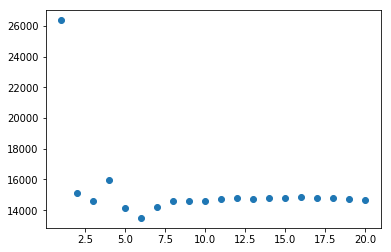

In [187]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x=hyper_params, y=mse_values)
plt.show()

### Varying Features and Hyperparameters

In [193]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

hyper_params = list(range(1, 21))
mse_values = []
features = train_df.columns.tolist()
features.remove('price')

train_features = train_df[features]
train_target = train_df['price']

test_features = test_df[features]
test_target = test_df['price']

for i in hyper_params:
    knn = KNeighborsRegressor(algorithm='brute', n_neighbors=i)
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_features)
    
    mse = mean_squared_error(test_target, predictions)
    mse_values.append(mse)

mse_values

[23303.759954493744,
 14917.940273037542,
 15006.17772721527,
 15428.660409556314,
 15275.559089874858,
 15482.547117937047,
 14958.776485338165,
 15122.70925767918,
 15074.869478503912,
 14821.576928327642,
 14719.231367350201,
 14810.321530147898,
 14880.471622540406,
 14971.06302384435,
 14969.896063708758,
 15079.081013580773,
 15105.101042786117,
 15263.298634812287,
 15219.189512761604,
 15213.659254835042]

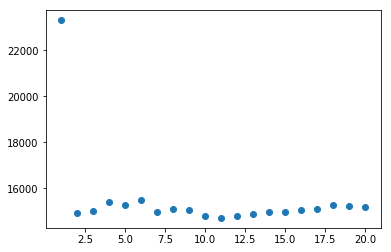

In [194]:
plt.scatter(x=hyper_params, y=mse_values)
plt.show()

### Practice the Workflow

In [211]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error



def find_lowest_hp_mse(train_data, test_data, features, target, hyper_params):
    mse_values = []
    
    train_features = train_data[features]
    train_target = train_data[target]

    test_features = test_df[features]
    test_target = test_df[target]
    
    for i in hyper_params:
        knn = KNeighborsRegressor(algorithm='brute', n_neighbors=i)
        knn.fit(train_features, train_target)
        predictions = knn.predict(test_features)

        mse = mean_squared_error(test_target, predictions)
        mse_values.append(mse)
    
    mse_min = min(mse_values)
    hyp_min = mse_values.index(mse_min) + 1
    hyp_mse = {hyp_min:mse_min}
    
    return hyp_mse
    
hyper_params = list(range(1, 21))

features = ['accommodates', 'bathrooms']
two_hyp_mse = find_lowest_hp_mse(train_df, test_df, features, 'price', hyper_params)

features = ['accommodates', 'bathrooms', 'bedrooms']
three_hyp_mse = find_lowest_hp_mse(train_df, test_df, features, 'price', hyper_params)

print(two_hyp_mse)
print(three_hyp_mse)

{5: 14790.314266211606}
{7: 13518.769009310208}


# *Cross Validation*

### Introduction

In [309]:
import pandas as pd
import numpy as np
np.random.seed(1)

dc_listings = pd.read_csv('dc_airbnb.csv')
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

split_one = dc_listings.iloc[:1862]
split_two = dc_listings[1862:]

print(split_one.shape)
print(split_two.shape)

split_one.head()

(1862, 19)
(1861, 19)


,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
574,100%,100%,1,2,Private room,1.0,1.0,1.0,125.0,NaN,$300.00,1,4,149,38.913548,-77.031981,Washington,20009,DC
1593,87%,100%,2,2,Private room,1.0,1.5,1.0,85.0,$15.00,NaN,1,30,49,38.953431,-77.030695,Washington,20011,DC
3091,100%,NaN,1,1,Private room,1.0,0.5,1.0,50.0,NaN,NaN,1,1125,1,38.933491,-77.029679,Washington,20010,DC
420,58%,51%,480,2,Entire home/apt,1.0,1.0,1.0,209.0,$150.00,NaN,4,730,2,38.904054,-77.051991,Washington,20037,DC
808,100%,95%,3,12,Entire home/apt,5.0,2.0,5.0,215.0,$135.00,$100.00,2,1825,34,38.906118,-76.988873,Washington,20002,DC


### Holdout Validation

In [310]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one

knn = KNeighborsRegressor()
knn.fit(train_one[['accommodates']], train_one['price'])
predictions = knn.predict(test_one[['accommodates']])
iteration_one_rmse = mean_squared_error(test_one['price'], predictions) ** 0.5

knn.fit(train_two[['accommodates']], train_two['price'])
predictions = knn.predict(test_two[['accommodates']])
iteration_two_rmse = mean_squared_error(test_two['price'], predictions) ** 0.5

avg_rmse = np.mean([iteration_one_rmse, iteration_two_rmse])
avg_rmse

128.96254732948216

### K-Fold Cross Validation

In [319]:
dc_listings.loc[dc_listings.index[:745], 'fold'] = 1
dc_listings.loc[dc_listings.index[745:1490], 'fold'] = 2
dc_listings.loc[dc_listings.index[1490:2234], 'fold'] = 3
dc_listings.loc[dc_listings.index[2234:2978], 'fold'] = 4
dc_listings.loc[dc_listings.index[2978:3723], 'fold'] = 5

print(dc_listings['fold'].isnull().sum())
dc_listings['fold'].value_counts()

0


5.0    745
2.0    745
1.0    745
4.0    744
3.0    744
Name: fold, dtype: int64

### First Iteration

In [292]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_data = dc_listings[dc_listings['fold'] > 1]
test_data = dc_listings[dc_listings['fold'] == 1]

knn = KNeighborsRegressor()
knn.fit(train_data[['accommodates']], train_data['price'])
labels = knn.predict(test_data[['accommodates']])

iteration_one_rmse = mean_squared_error(test_data['price'], labels) ** 0.5
iteration_one_rmse

107.04609155929425

### Function for Training Models

In [320]:
def train_and_validate(df, folds):
    knn = KNeighborsRegressor()
    rmses = []
    
    for i in folds:
        train_data = dc_listings.loc[dc_listings['fold'] != i]
        test_data = dc_listings.loc[dc_listings['fold'] == i]
        
        knn.fit(train_data[['accommodates']], train_data['price'])
        labels = knn.predict(test_data[['accommodates']])
        
        rmse = mean_squared_error(test_data['price'], labels) ** 0.5
        rmses.append(rmse)
        
    return rmses

rmses = train_and_validate(dc_listings, list(range(1, 6)))
avg_rmses = np.mean(rmses)

print(rmses)
print(avg_rmses)    

[107.04609155929425, 136.62225078440179, 153.0273362676136, 107.39207160219395, 146.9242838376558]
130.20240681023188


### Performing K-Fold Cross Validation Using Scikit-Learn

In [339]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=1)
knn = KNeighborsRegressor()

mses = cross_val_score(knn, dc_listings[['accommodates']], dc_listings['price'], 
                       scoring="neg_mean_squared_error", cv=kf)
    
rmses = [np.abs(x)**0.5 for x in mses]
avg_rmse = np.mean(rmses)
avg_rmse

134.66322485283825

### Exploring Different K Values

In [340]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, dc_listings[["accommodates"]], dc_listings["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))

3 folds:  avg RMSE:  126.19223474162338 std RMSE:  1.1069911739514842
5 folds:  avg RMSE:  134.66322485283825 std RMSE:  17.06396645051883
7 folds:  avg RMSE:  128.76102940687468 std RMSE:  15.113036472055438
9 folds:  avg RMSE:  130.97403954965455 std RMSE:  17.552727811846307
10 folds:  avg RMSE:  129.38243003886737 std RMSE:  22.858028610253182
11 folds:  avg RMSE:  128.5209174821928 std RMSE:  21.039336959245166
13 folds:  avg RMSE:  128.66536927916962 std RMSE:  29.931738536000207
15 folds:  avg RMSE:  127.74903938013544 std RMSE:  30.22520525014004
17 folds:  avg RMSE:  125.08689980063376 std RMSE:  34.7037432777398
19 folds:  avg RMSE:  123.24952437277325 std RMSE:  37.93258646028018
21 folds:  avg RMSE:  129.74292153412665 std RMSE:  36.31090634328946
23 folds:  avg RMSE:  129.91038839859866 std RMSE:  37.34861558876879
